# Exercise 6.9

In this exercise, we will predict the number of applications received
using the other variables in the `College` data set.

## (a) Split the data set into a training set and a test set.

In [ ]:
train_index <- sample(777, 389)
train <- College[train_index,]
test <- College[-train_index,]

## (b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [ ]:
lm.fit <- lm(Apps ~ ., data=train)
lm.pred <- predict(lm.fit, test)
lm.error <- mean((test$Apps - lm.pred)^2)
lm.error

[1] 880749.2

## (c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

In [ ]:
x <- model.matrix(Apps ~ ., College)[, -1]
y <- College$Apps
set.seed(1)

[1] 404.1086

[1] 920311.2

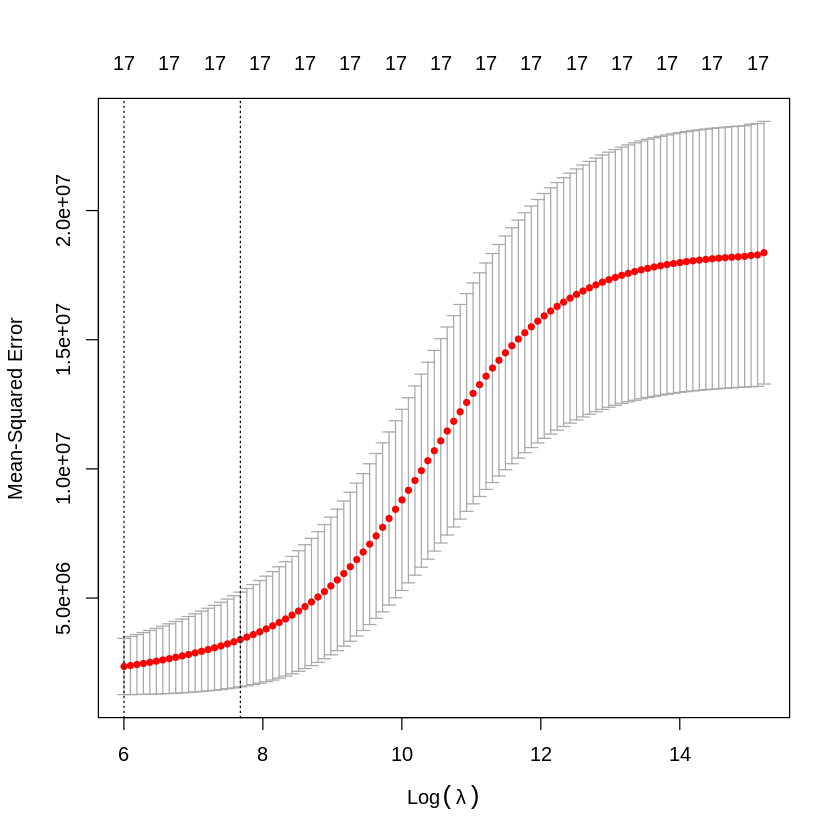

In [ ]:
cv.out1 <- cv.glmnet(x[train_index, ], y[train_index], alpha=0)
plot(cv.out1)

bestlam1 <- cv.out1$lambda.min
bestlam1

ridge.mod <- glmnet(x[train_index, ], y[train_index], alpha=0, lambda=bestlam1)
ridge.pred <- predict(ridge.mod, s=bestlam1, newx=x[-train_index, ])
ridge.error <- mean((test$Apps - ridge.pred)^2)
ridge.error

## (d) Fit a lasso model on the training set, with $\lambda$ chosen by cross validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

[1] 16.69782

[1] 870134.1

18 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -991.43733791
PrivateYes  -315.96123571
Accept         1.54219925
Enroll        -0.40226548
Top10perc     42.46495595
Top25perc     -9.50541262
F.Undergrad    .         
P.Undergrad    0.04962467
Outstate      -0.07151560
Room.Board     0.19152580
Books          .         
Personal       0.08775665
PhD           -1.94621696
Terminal      -6.39727645
S.F.Ratio     14.55162508
perc.alumni    .         
Expend         0.07290882
Grad.Rate      4.14363121

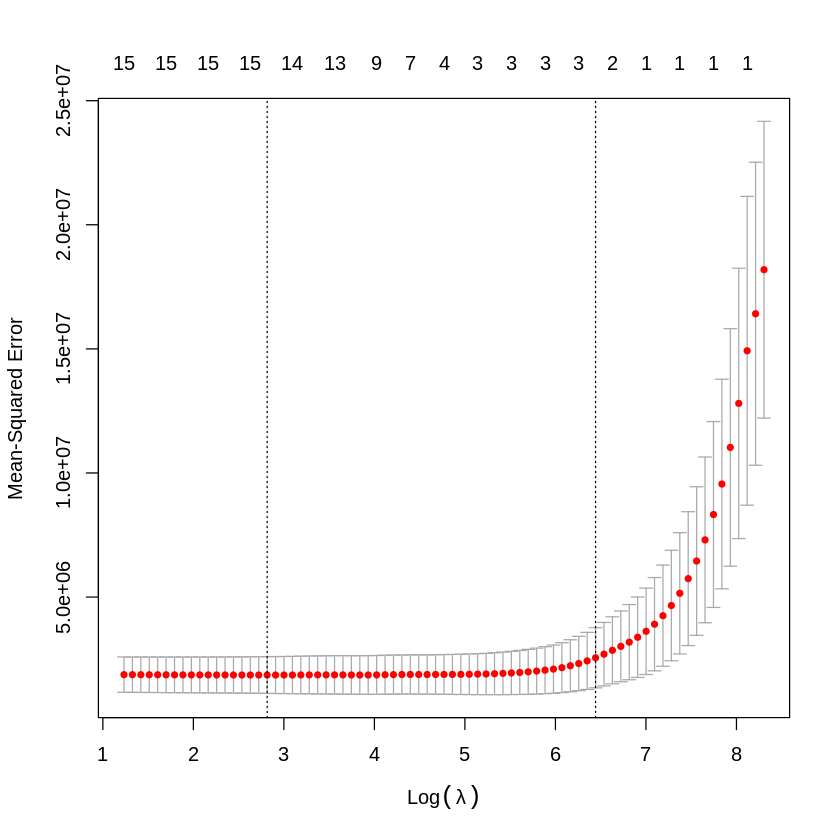

In [ ]:
cv.out2 <- cv.glmnet(x[train_index, ], y[train_index], alpha=1)
plot(cv.out2)

bestlam2 <- cv.out2$lambda.min
bestlam2

lasso.mod <- glmnet(x[train_index, ], y[train_index], alpha=1, lambda=bestlam2)
lasso.pred <- predict(lasso.mod, s=bestlam2, newx=x[-train_index, ])
lasso.error <- mean((test$Apps - lasso.pred)^2)
lasso.error

lasso.coef <- predict(lasso.mod, type="coefficients", s=bestlam2)
lasso.coef

16 out of 18 coefficient estimates are non-zero.

## (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these ~five~ three approaches?

In [ ]:
TSS <- sum((test$Apps - mean(test$Apps))^2)
1-sum((test$Apps - lm.pred)^2)/TSS
1-sum((test$Apps - ridge.pred)^2)/TSS
1-sum((test$Apps - lasso.pred)^2)/TSS
(ridge.error-lm.error)/lm.error*100
(lasso.error-lm.error)/lm.error*100

[1] 0.9237634

[1] 0.920339

[1] 0.9246823

[1] 4.491855

[1] -1.205239

The first three values are $R^2$ of ordinary least squares, ridge, and lasso models, respectively. Since $R^2$ measures the proportion of variability in $Y$ that can be explained using $X$, about 92% of variabilty can be explained by each model.

Based on the test error of the OLS model, that of the ridge model is increased by 4.49%, that of the lasso model is decreased by 1.21%. Those values will change if we set another random seed.